In [249]:
import os
import glob

import ast
from pathlib import Path
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_weight('bold')

%pwd
%cd /home/s2135982/QC_datastore/rivertools/mlfluv
%pwd
# Add the parent directory to the system path

/exports/csce/datastore/geos/users/s2135982/rivertools/mlfluv


'/exports/csce/datastore/geos/users/s2135982/rivertools/mlfluv'

In [238]:
river_ord_palette = ['#000000', '#0072B2','#009E73','#D55E00', '#CC79A7','#F0E442'] # '#E69F00','#56B4E9',
marker_styles = ['o', 'o', '.', '.', 'x', 'x']  # Different markers for different orders

point_type_palette = ['#999999', '#E69F00', "#ee82ee"] # bare, sedi, urban

In [250]:
def plot_scatter_by_riv_ord(df, order_color_map, sufix, with_count_plot_inset=True):
    map_path = Path('data/Amazon_HydroSHEDS_river_networks/Amazon_basin_v2.shp')
    # Load the map of the Amazon River basin
    amazon_basin = gpd.read_file(map_path)
    
    # Get unique 'riv_order' values
    riv_orders = sorted(order_color_map.keys())
    
    # Plot the Amazon River basin map
    fig, ax = plt.subplots(figsize=(10, 10))
    amazon_basin.plot(ax=ax, color='white', edgecolor='black')

    # Create a scatter plot for each 'riv_order' value
    for i, riv_order in enumerate(riv_orders):
        subset = df[df['riv_order'] == riv_order]
        color = order_color_map[riv_order]
        marker = marker_styles[i % len(marker_styles)]
        ax.scatter(subset['x'], subset['y'], c=color, marker=marker, alpha=0.6, s=40, label=f'Order {riv_order}')

    if with_count_plot_inset:

        # Create a second set of axes for the count plot
        ax_inset = plt.axes([0.14, 0.21, 0.12, 0.12])  # [left, bottom, width, height]
        sns.countplot(x='riv_order', data=df, palette=order_color_map.values(),order=riv_orders,ax=ax_inset)
        # ax_inset.set_title('Count of samples by HydroSHEDS river order')
        ax_inset.set_xlabel('River Order', fontweight='bold', fontsize=16)
        ax_inset.set_ylabel('Count', fontweight='bold', fontsize=16)

        # Adjust orientation of axis labels
        ax_inset.xaxis.set_label_position('top')
        ax_inset.yaxis.set_label_position('right')
        # Adjust tick positions and labels
        ax_inset.tick_params(axis='x', which='both', bottom=False, top=True, direction='inout', labelrotation=0, labeltop=True, labelbottom=False, labelsize=14)
        ax_inset.tick_params(axis='y', which='both', left=False, right=True, direction='inout', labelright=True, labelleft=False, labelsize=14)

    # Set properties for main plot
    ax.set_xlabel('Longitude', fontweight='bold', fontsize=16)
    ax.set_ylabel('Latitude', fontweight='bold', fontsize=16)
    ax.tick_params(labelsize=16)
    ax.legend(fontsize='large',ncol=2)

    # plt.show()
    plt.savefig(f'paper_fig/sample_distribution_{sufix}.png', dpi=500)

def plot_scatter_by_point_type(df, type_color_map):

    map_path = Path('data/Amazon_HydroSHEDS_river_networks/Amazon_basin_v2.shp')
    # Load the map of the Amazon River basin
    amazon_basin = gpd.read_file(map_path)
    
    # Get unique 'riv_order' values
    point_types = df['point_type'].unique()
    print(point_types)
    
    # Plot the Amazon River basin map
    fig, ax = plt.subplots(figsize=(10, 10))
    amazon_basin.plot(ax=ax, color='white', edgecolor='black')

    # Create a scatter plot for each 'riv_order' value
    for i, point_type in enumerate(point_types):
        subset = df[df['point_type'] == point_type]
        print(subset.head(5))
        color = type_color_map[point_type]
        # marker = marker_styles[i % len(marker_styles)]
        ax.scatter(subset['x'], subset['y'], c=color, alpha=0.6, s=40, label=f'{point_type}')

    # Set properties for main plot
    ax.set_xlabel('Longitude', fontweight='bold', fontsize=16)
    ax.set_ylabel('Latitude', fontweight='bold', fontsize=16)
    ax.tick_params(labelsize=16)
    ax.legend(fontsize='large', loc='upper right')

    # plt.show()
    plt.savefig(f'paper_fig/sample_distribution_incre_type.png', dpi=500)

In [240]:
bare_points_path = Path('data/train_meta/network_points_bare.csv')
sedi_points_path = Path('data/train_meta/network_points_sediment.csv')
urban_points_path = Path('data/train_meta/network_points_urban.csv')
init_points_path = Path('data/train_meta/network_points_init_dataset.csv')
test_points_path = Path('data/train_meta/network_points_test.csv')

df_init = pd.read_csv(init_points_path)
df_test = pd.read_csv(test_points_path)
# print(df_init.head(5))

df_incre_bare = pd.read_csv(bare_points_path)
df_incre_sedi = pd.read_csv(sedi_points_path)
df_incre_urban = pd.read_csv(urban_points_path)

df_incre_bare['point_type'] = 'Bare ground'
df_incre_urban['point_type'] = 'Urban'
df_incre_sedi['point_type'] = 'Fluvial sediment'

df_incre = pd.concat([df_incre_sedi, df_incre_bare, df_incre_urban], ignore_index=True)

def extract_coordinates(coord_string):
    # Step 1: Remove the parentheses
    cleaned_str = coord_string.strip('()')
    
    # Step 2: Split the string by the comma
    x_str, y_str = cleaned_str.split(', ')
    
    # Step 3: Convert strings to float
    x = float(x_str)
    y = float(y_str)
    
    return pd.Series({'x': x, 'y': y})

# Apply the function to 'coordinates' column
df_incre[['x', 'y']] = df_incre['coordinates'].apply(extract_coordinates)
df_init[['x', 'y']] = df_init['coordinates'].apply(extract_coordinates)
df_test[['x', 'y']] = df_test['coordinates'].apply(extract_coordinates)


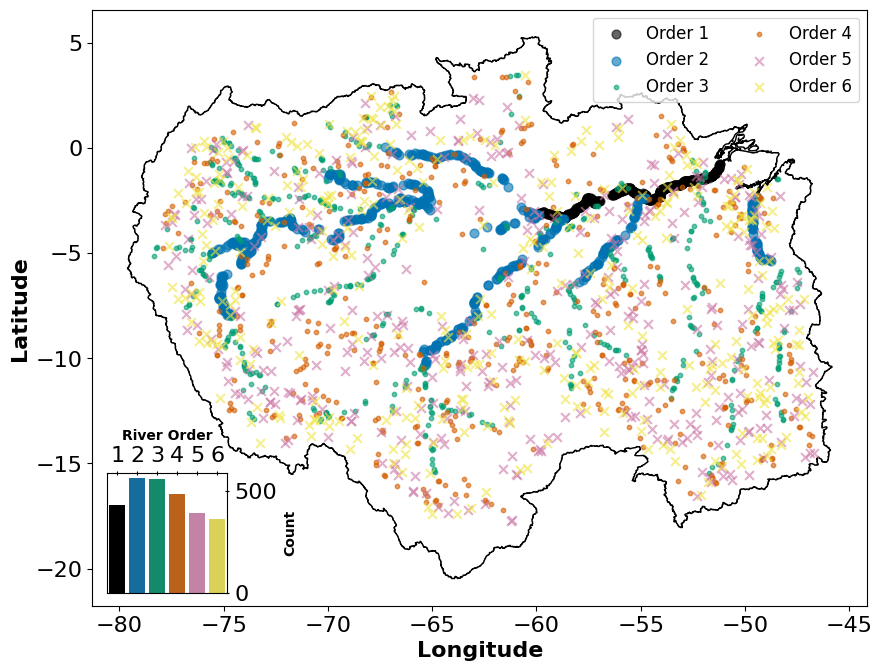

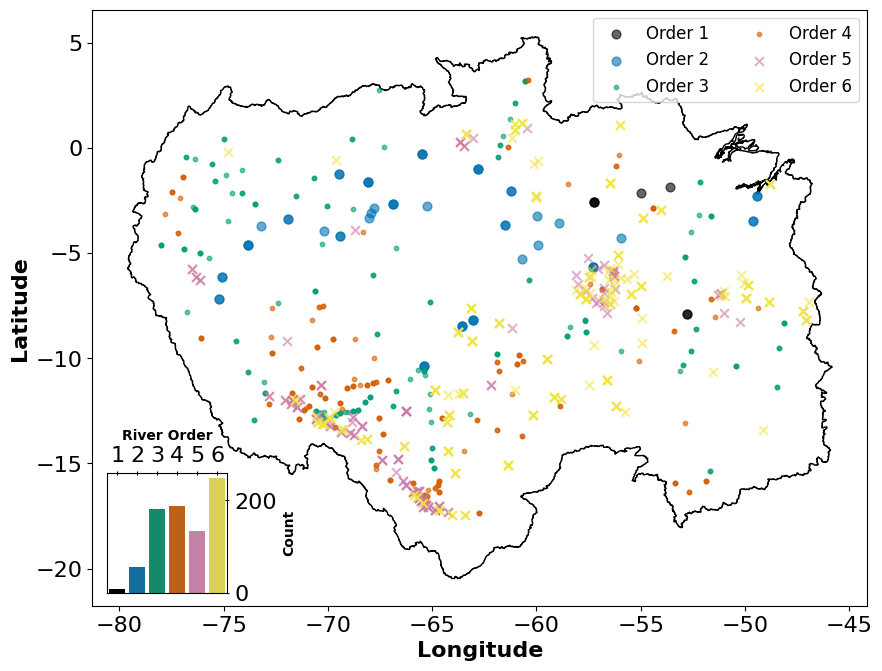

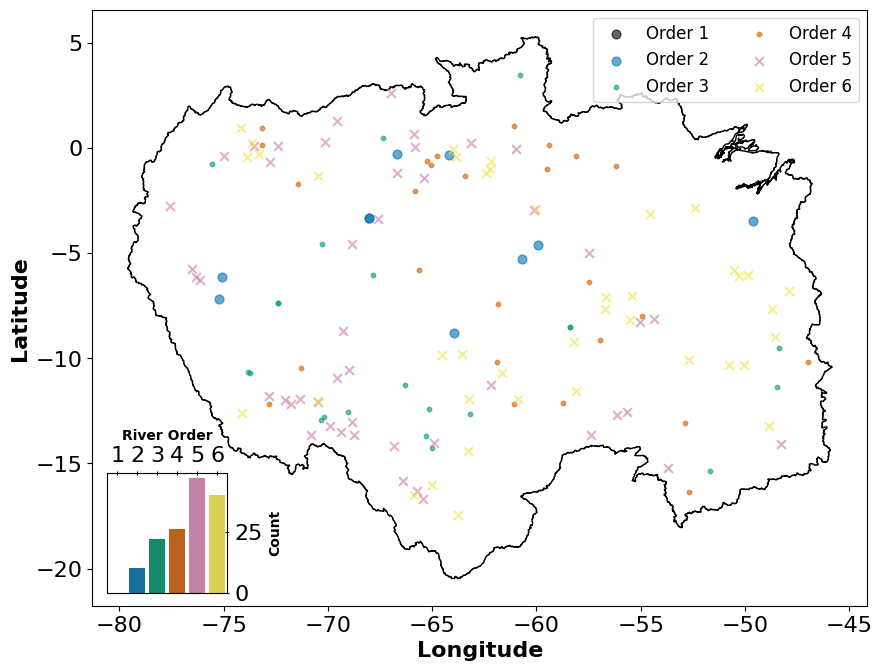

In [251]:
# Include all possible riv_order values to ensure consistent color mapping
order_color_map = {
    1: river_ord_palette[0],
    2: river_ord_palette[1],
    3: river_ord_palette[2],
    4: river_ord_palette[3],
    5: river_ord_palette[4],
    6: river_ord_palette[5]
}
plot_scatter_by_riv_ord(df_init, order_color_map, 'init')
plot_scatter_by_riv_ord(df_incre, order_color_map, 'incremental')
plot_scatter_by_riv_ord(df_test, order_color_map, 'test')

['Fluvial sediment' 'Bare ground' 'Urban']
                coordinates  riv_order  upland_drainage_area  acc_rainfall  \
0     (-77.46363, -2.10528)          4             13812.304      9.666929   
1     (-61.16225, -8.57487)          5               277.860   -999.000000   
2   (-70.187581, -13.13758)          6                45.772   -999.000000   
3  (-69.972932, -12.847914)          6                16.114   -999.000000   
4     (-56.62162, -7.87132)          5               457.532   -999.000000   

   cloud_prob        point_type          x          y  
0    0.026820  Fluvial sediment -77.463630  -2.105280  
1   36.465385  Fluvial sediment -61.162250  -8.574870  
2    0.249042  Fluvial sediment -70.187581 -13.137580  
3    2.586207  Fluvial sediment -69.972932 -12.847914  
4   46.965385  Fluvial sediment -56.621620  -7.871320  
                coordinates  riv_order  upland_drainage_area  acc_rainfall  \
592    (-56.1846, -12.2778)          6                47.828      0.000000

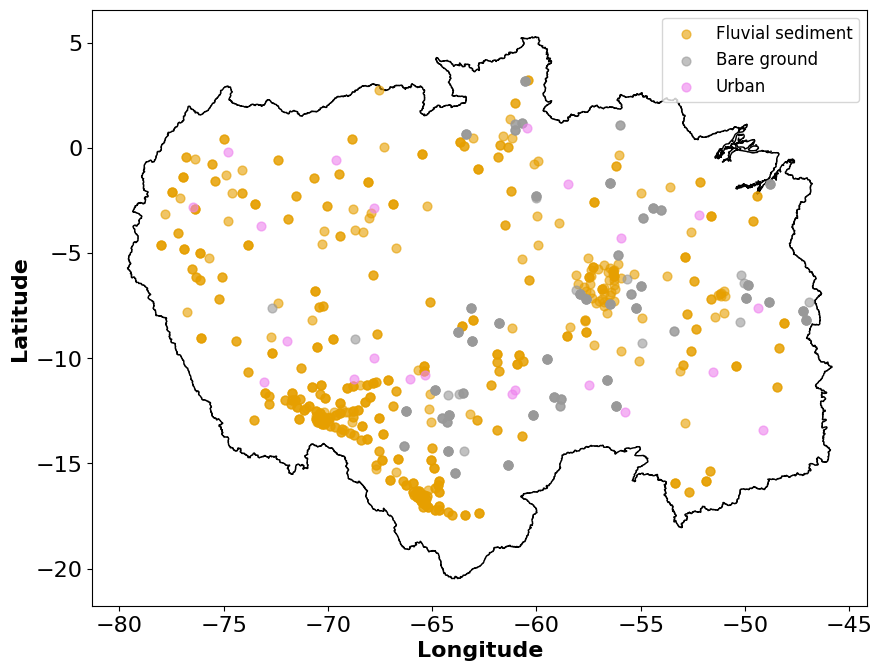

In [242]:
type_color_map = {
    'Bare ground': point_type_palette[0],
    'Fluvial sediment': point_type_palette[1],
    'Urban': point_type_palette[2]
}
plot_scatter_by_point_type(df_incre, type_color_map)

In [ ]:
plt.figure(figsize=(10, 6))

riv_orders = [1,2,3,4,5,6]

# Create a KDE plot for each 'riv_order' value
for riv_order in riv_orders:
    subset = df_test[df_test['riv_order'] == riv_order]
    sns.kdeplot(np.log(subset['upland_drainage_area']), label=f'Order {riv_order}', fill=True)

plt.title('KDE Plot for Log Transformed Upland Drainage Area by Riv Order')
plt.xlabel('Log Transformed Upland Drainage Area')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
data_path = '/exports/csce/datastore/geos/groups/LSDTopoData/MLFluv/mlfluv_s12lulc_data' #_RANDOM'
# data_path = '/exports/csce/datastore/geos/users/s2135982/MLFLUV_DATA/data_sediment_rich_samples'
# data_path = Path('/exports/csce/datastore/geos/groups/LSDTopoData/MLFluv/mlfluv_s12lulc_data_water_from_sediment_rich_sample')
folder_list = os.listdir(data_path)
print(len(folder_list))
meta_files = glob.glob(os.path.join(data_path, '**/*meta.csv'), recursive=True)
print(len(meta_files))

# Create an empty list to hold dataframes
dfs = []
# Loop over the list of csv files
for file in meta_files:
    # Read each csv file into a DataFrame and append to the list
    dfs.append(pd.read_csv(file))

# Concatenate all dataframes in the list into a single dataframe
df = pd.concat(dfs, ignore_index=True)

In [ ]:
# For sediment rich samples, uncomment the following 4 lines 
# the coordinates are stored as a string, so it needs to be convert to a tupple of float first 
df['point'] = df['point'].apply(lambda x: ast.literal_eval(x))
df['x'] = df['point'].apply(lambda x: x[0])
df['y'] = df['point'].apply(lambda x: x[1])

sns.countplot(x='riv_order', data=df)
plt.title('Count of samples by HydroSHEDS river order')
plt.show()

In [ ]:
# Get unique 'riv_order' values
riv_orders = sorted(df['riv_order'].unique())

# Create a scatter plot for each 'riv_order' value
for riv_order in riv_orders:
    subset = df[df['riv_order'] == riv_order]
    plt.scatter(subset['x'], subset['y'], alpha=0.5, label=f'River Order {riv_order}')

plt.title('Scatter Plot for Longitude and Latitude by Riv Order')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Create a KDE plot for each 'riv_order' value
for riv_order in riv_orders:
    subset = df[df['riv_order'] == riv_order]
    sns.kdeplot(np.log(subset['drainage_area']), label=f'River Order {riv_order}', fill=True)

plt.title('KDE Plot for Log Transformed Upland Drainage Area by Riv Order')
plt.xlabel('Log Transformed Upland Drainage Area')
plt.ylabel('Density')
plt.legend()
plt.show()
